In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression ,LinearRegression ,Lasso ,Ridge
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split ,KFold ,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB ,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv("wind_turbine_maintenance_data.csv")
data

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label
0,1,15.496714,7.861736,1564.768854,72.615149,73.829233,1.953173,17.896064,67.674347,0
1,1,15.079832,7.840483,1502.222183,62.861035,72.340913,1.976505,11.110395,52.320235,0
2,1,17.559488,8.394233,1512.221917,62.422822,71.998731,2.189488,11.455170,53.644403,0
3,1,15.822545,6.779156,1520.886360,55.201649,68.359070,2.039372,13.692333,61.713683,0
4,1,15.564464,8.025501,1547.319325,68.295953,86.703732,2.214197,10.482082,64.191021,1
...,...,...,...,...,...,...,...,...,...,...
35035,2,14.041303,9.052880,1403.748814,65.538012,72.123338,2.282305,9.390814,68.075873,0
35036,2,14.703166,8.809087,1294.202009,59.602939,79.064765,2.112434,13.204614,52.360664,0
35037,2,15.388032,8.867235,1297.483022,66.055361,86.042779,1.947465,16.487396,61.599800,0
35038,2,15.166837,8.430216,1325.573380,66.105359,65.192135,2.000636,10.735241,46.782986,0


In [3]:
data.astype(float)

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label
0,1.0,15.496714,7.861736,1564.768854,72.615149,73.829233,1.953173,17.896064,67.674347,0.0
1,1.0,15.079832,7.840483,1502.222183,62.861035,72.340913,1.976505,11.110395,52.320235,0.0
2,1.0,17.559488,8.394233,1512.221917,62.422822,71.998731,2.189488,11.455170,53.644403,0.0
3,1.0,15.822545,6.779156,1520.886360,55.201649,68.359070,2.039372,13.692333,61.713683,0.0
4,1.0,15.564464,8.025501,1547.319325,68.295953,86.703732,2.214197,10.482082,64.191021,1.0
...,...,...,...,...,...,...,...,...,...,...
35035,2.0,14.041303,9.052880,1403.748814,65.538012,72.123338,2.282305,9.390814,68.075873,0.0
35036,2.0,14.703166,8.809087,1294.202009,59.602939,79.064765,2.112434,13.204614,52.360664,0.0
35037,2.0,15.388032,8.867235,1297.483022,66.055361,86.042779,1.947465,16.487396,61.599800,0.0
35038,2.0,15.166837,8.430216,1325.573380,66.105359,65.192135,2.000636,10.735241,46.782986,0.0


In [4]:
data = data[data["Maintenance_Label"] != 2]

In [5]:
data.isnull().sum().sum()

np.int64(0)

In [6]:
data.groupby("Maintenance_Label")["Maintenance_Label"].count().unique()

array([29241,  2932])

In [7]:
data.groupby("Maintenance_Label")["Maintenance_Label"].unique()

Maintenance_Label
0    [0]
1    [1]
Name: Maintenance_Label, dtype: object

In [8]:
data1=data.drop(['Turbine_ID'],axis=1)
data1

,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label
0,15.496714,7.861736,1564.768854,72.615149,73.829233,1.953173,17.896064,67.674347,0
1,15.079832,7.840483,1502.222183,62.861035,72.340913,1.976505,11.110395,52.320235,0
2,17.559488,8.394233,1512.221917,62.422822,71.998731,2.189488,11.455170,53.644403,0
3,15.822545,6.779156,1520.886360,55.201649,68.359070,2.039372,13.692333,61.713683,0
4,15.564464,8.025501,1547.319325,68.295953,86.703732,2.214197,10.482082,64.191021,1
...,...,...,...,...,...,...,...,...,...
35034,15.806027,6.741062,1339.588452,59.607591,75.780136,1.456971,7.722445,77.340887,0
35035,14.041303,9.052880,1403.748814,65.538012,72.123338,2.282305,9.390814,68.075873,0
35036,14.703166,8.809087,1294.202009,59.602939,79.064765,2.112434,13.204614,52.360664,0
35037,15.388032,8.867235,1297.483022,66.055361,86.042779,1.947465,16.487396,61.599800,0


<Axes: >

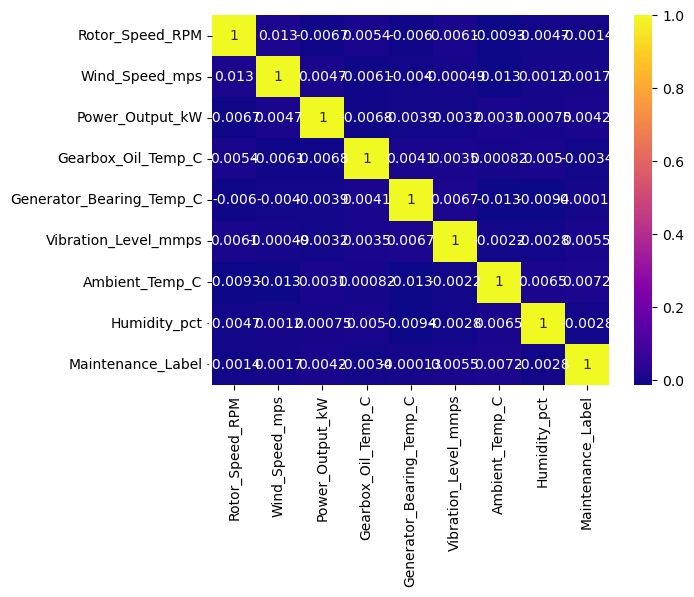

In [9]:
sns.heatmap(data1.corr(),annot=True,cmap="plasma")

In [10]:
features = data.drop(["Turbine_ID","Maintenance_Label"],axis=1)
features

,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct
0,15.496714,7.861736,1564.768854,72.615149,73.829233,1.953173,17.896064,67.674347
1,15.079832,7.840483,1502.222183,62.861035,72.340913,1.976505,11.110395,52.320235
2,17.559488,8.394233,1512.221917,62.422822,71.998731,2.189488,11.455170,53.644403
3,15.822545,6.779156,1520.886360,55.201649,68.359070,2.039372,13.692333,61.713683
4,15.564464,8.025501,1547.319325,68.295953,86.703732,2.214197,10.482082,64.191021
...,...,...,...,...,...,...,...,...
35034,15.806027,6.741062,1339.588452,59.607591,75.780136,1.456971,7.722445,77.340887
35035,14.041303,9.052880,1403.748814,65.538012,72.123338,2.282305,9.390814,68.075873
35036,14.703166,8.809087,1294.202009,59.602939,79.064765,2.112434,13.204614,52.360664
35037,15.388032,8.867235,1297.483022,66.055361,86.042779,1.947465,16.487396,61.599800


In [11]:
target = pd.DataFrame(data.Maintenance_Label)
target

,Maintenance_Label
0,0
1,0
2,0
3,0
4,1
...,...
35034,0
35035,0
35036,0
35037,0


In [12]:
import warnings

In [13]:
dt=cross_val_score(DecisionTreeClassifier(),features,target,cv=3)
dt

array([0.82554779, 0.8190041 , 0.82208131])

In [14]:
warnings.filterwarnings("ignore")
rm=dt=cross_val_score(RandomForestClassifier(n_estimators=10),features,target,cv=3)
warnings.filterwarnings("ignore")
rm

array([0.90871795, 0.90824319, 0.90842969])

In [15]:
warnings.filterwarnings("ignore")
log=cross_val_score(LogisticRegression(max_iter=100000),features,target,cv=3)
warnings.filterwarnings("ignore")
log

array([0.90881119, 0.90889593, 0.90889593])

In [16]:
warnings.filterwarnings("ignore")
svm=cross_val_score(SVC(),features,target,cv=3)
warnings.filterwarnings("ignore")
svm

array([0.90881119, 0.90889593, 0.90889593])

In [17]:
warnings.filterwarnings("ignore")
gn=cross_val_score(GaussianNB(),features,target,cv=3)
warnings.filterwarnings("ignore")
gn

array([0.90881119, 0.90889593, 0.90889593])

In [18]:
warnings.filterwarnings("ignore")
knn=cross_val_score(KNeighborsClassifier(n_neighbors=5),features,target,cv=3)
warnings.filterwarnings("ignore")
knn

array([0.90433566, 0.90134278, 0.90311451])

In [19]:
## create train and test data
Features_train,Features_test,Target_train,Target_test=train_test_split(features,target,test_size=0.05)

In [20]:
print("Bagging with Logistic Regression:")
bagging_model = BaggingClassifier(
    estimator=make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000)),
    n_estimators=30,
    random_state=42
)

#cross-validation
warnings.filterwarnings("ignore")
bag = cross_val_score(bagging_model, features, target.values.ravel(), cv=3)
warnings.filterwarnings("ignore")
print(bag)


Bagging with Logistic Regression:
[0.90881119 0.90889593 0.90889593]


In [21]:
def plot_model_predictions(ytrain, ytrp, ytest, ytep, model_name="Model"):
    fig, axes = plt.subplots(11, 1, figsize=(16, 55))  # 11 vertical subplots

    sns.lineplot(x=range(2000), y=ytrain[:2000], color='blue', alpha=0.5, ax=axes[0])
    sns.lineplot(x=range(2000), y=ytrp[:2000], color='green', alpha=0.5, ax=axes[0])
    axes[0].set_title(f"{model_name} - Full Train vs Predicted")
    
    sns.lineplot(x=range(200), y=ytrain[:200], color='blue', ax=axes[1])
    sns.lineplot(x=range(200), y=ytrp[:200], color='green', alpha=0.7, ax=axes[1])
    axes[1].set_title(f"{model_name} - First 200 Train vs Predicted")
    
    sns.lineplot(x=range(200), y=ytrain[:200], color='blue', ax=axes[2])
    axes[2].set_title(f"{model_name} - First 200 Train Only")
    
    sns.lineplot(x=range(200), y=ytrp[:200], color='green', ax=axes[3])
    axes[3].set_title(f"{model_name} - First 200 Predicted Train Only")
    
    sns.lineplot(x=ytrain[:20000], y=ytrp[:20000], color='orange', ax=axes[4])
    axes[4].set_title(f"{model_name} - Train vs Predicted Scatter")
    
    sns.lineplot(x=ytrain[:200], y=ytrp[:200], color='orange', ax=axes[5])
    axes[5].set_title(f"{model_name} - First 200 Train vs Predicted Scatter")
    
    sns.lineplot(x=range(200), y=ytest[:200], color='blue', ax=axes[6])
    sns.lineplot(x=range(200), y=ytep[:200], color='green', alpha=0.7, ax=axes[6])
    axes[6].set_title(f"{model_name} - First 200 Test vs Predicted")
    
    sns.lineplot(x=range(200), y=ytest[:200], color='blue', ax=axes[7])
    axes[7].set_title(f"{model_name} - First 200 Test Only")
    
    sns.lineplot(x=range(200), y=ytep[:200], color='green', ax=axes[8])
    axes[8].set_title(f"{model_name} - First 200 Predicted Test Only")
    
    sns.lineplot(x=ytest, y=ytep, color='orange', ax=axes[9])
    axes[9].set_title(f"{model_name} - Test vs Predicted Scatter")

    sns.lineplot(x=ytest[:200], y=ytep[:200], color='orange', ax=axes[10])
    axes[10].set_title(f"{model_name} - First 200 Test vs Predicted Scatter")
    
    plt.tight_layout()
    plt.show()


In [22]:
bagging_model = BaggingClassifier(
    estimator=make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000)),
    n_estimators=30,
    random_state=42
)
bagging_model.fit(features,target)

ypred_train=pd.DataFrame()
ypred_test=pd.DataFrame()

ypred_train['p'] = bagging_model.predict(Features_train).flatten()
ypred_test['p'] = bagging_model.predict(Features_test).flatten()
try:    
    print("Linear Regression:")
    print("model score :",bagging_model.score(Features_test,Target_test))
except Exception :
    pass   

Linear Regression:
model score : 0.8937228091982597


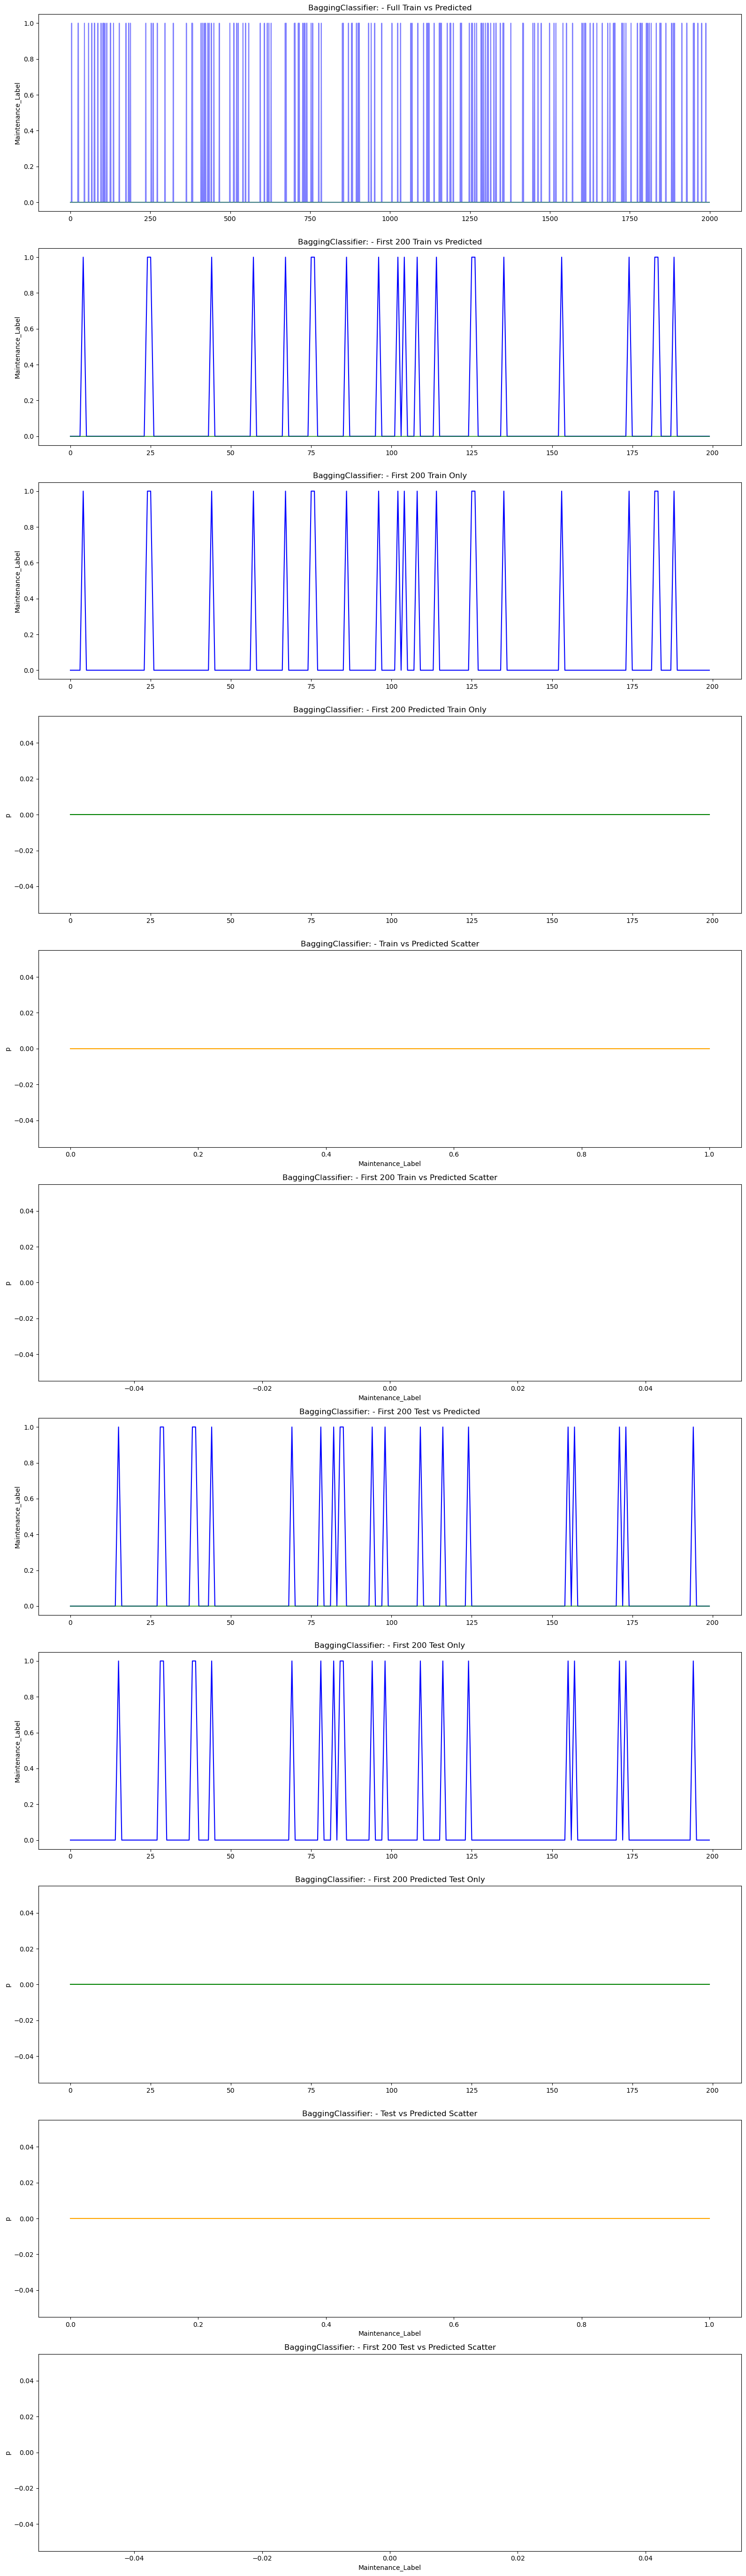

CPU times: total: 6.28 s
Wall time: 6.54 s


In [23]:
%%time
plot_model_predictions(Target_train.Maintenance_Label,ypred_train.p,Target_test.Maintenance_Label,ypred_test.p,
    model_name="BaggingClassifier:"
)

In [24]:
import joblib
joblib.dump(bagging_model, "windmill_failure_dection.pkl")
print("Model saved as 'windmill_failure_dection.pkl'")

Model saved as 'windmill_failure_dection.pkl'


In [25]:
def predict_system_production(model_path="windmill_failure_dection.pkl"):
    import joblib
    import numpy as np

    model = joblib.load(model_path)

    rotor_speed_rpm = float(input("Rotor Speed (RPM): "))
    wind_speed_mps = float(input("Wind Speed (m/s): "))
    power_output_kw = float(input("Power Output (kW): "))
    gearbox_oil_temp_c = float(input("Gearbox Oil Temp (°C): "))
    generator_bearing_temp_c = float(input("Generator Bearing Temp (°C): "))
    vibration_level_mmps = float(input("Vibration Level (mm/s): "))
    ambient_temp_c = float(input("Ambient Temp (°C): "))
    humidity_pct = float(input("Humidity (%): "))

    features = np.array([[rotor_speed_rpm,
                          wind_speed_mps,
                          power_output_kw,
                          gearbox_oil_temp_c,
                          generator_bearing_temp_c,
                          vibration_level_mmps,
                          ambient_temp_c,
                          humidity_pct]])

    prediction = model.predict(features).item()
    print("Predicted:", prediction)
    return prediction


In [26]:
ans=predict_system_production("windmill_failure_dection.pkl")

Rotor Speed (RPM):  745
Wind Speed (m/s):  123
Power Output (kW):  456
Gearbox Oil Temp (°C):  467
Generator Bearing Temp (°C):  81
Vibration Level (mm/s):  123
Ambient Temp (°C):  144
Humidity (%):  45678


Predicted: 0


In [27]:
ans





0